In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import (
    KMeans,
    AgglomerativeClustering,
    SpectralClustering,
    AffinityPropagation,
    Birch,
)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 300)

In [2]:
df = pd.read_csv("vic3.csv")
df["GDP"] = df["GDP"].apply(
    lambda x: (
        float(x.replace("M", "").replace(",", ".")) * 1000000
        if "M" in x
        else float(x.replace("K", "").replace(",", ".")) * 1000
    )
)
df["Population"] = df["Population"].apply(
    lambda x: (
        float(x.replace("M", "").replace(",", ".")) * 100000
        if "M" in x
        else float(x.replace("K", "").replace(",", ".")) * 1000
    )
)
df["SoL"] = df["SoL"].apply(lambda x: float(x.replace(",", ".").replace(",", ".")))

df["Market Volume"] = df["Market Volume"].apply(
    lambda x: (
        float(x.replace("M", "").replace(",", ".")) * 1000000
        if "M" in x
        else float(x.replace("K", "").replace(",", ".")) * 1000 if "K" in x else float(x.replace(",", "."))
    )
)

df["Arable Lands"] = df["Arable Lands"].apply(
    lambda x: (
        float(x.replace("K", "").replace(",", ".")) * 1000 if "K" in x else float(x.replace("K", "").replace(",", "."))
    )
)


columns = ["Vassals", "Tributaries", "Personal Unions", "Puppets", "Protectorates", "Dominions"]
for column in columns:
    df[column] = df[column].apply(lambda x: len(x.split(",")) if pd.notna(x) else 0)


mapper_name = {
    "Sovereignity Status_Dominion": "IsDominion",
    "Sovereignity Status_Free": "IsFree",
    "Sovereignity Status_Personal Union": "IsPersonalUnion",
    "Sovereignity Status_Puppet": "IsPuppet",
    "Sovereignity Status_Protectorate": "IsProtectorate",
    "Sovereignity Status_Tributary": "IsTributary",
    "Sovereignity Status_Vassal": "IsVassal",
}

df = pd.get_dummies(df, columns=["Sovereignity Status"])
for key, value in mapper_name.items():
    df = df.rename(columns={key: value})
    df[value] = df[value].astype(int)


df

,Rank,Country,Prestige,GDP,SoL,Population,Coast Access,Battalions,Market Volume,Arable Lands,Vassals,Tributaries,Personal Unions,Protectorates,Puppets,Dominions,States,Technologies,Literacy,Available Infrastructure,Peasantry,Playable,IsDominion,IsFree,IsPersonalUnion,IsProtectorate,IsPuppet,IsTributary,IsVassal
0,1,Great Britain,999,24300000.0,10.7,2720000.0,1,121,1880000.0,1030.0,0,0,1,5,11,2,28,51,56.00,1931,48.8,1.0,0,1,0,0,0,0,0
1,2,France,650,23200000.0,10.2,3450000.0,1,187,518000.0,1720.0,0,0,0,1,0,0,29,51,43.00,679,65.7,1.0,0,1,0,0,0,0,0
2,3,Russia,465,28900000.0,8.7,5700000.0,1,206,659000.0,4180.0,0,0,1,3,1,0,80,32,14.60,1714,76.0,1.0,0,1,0,0,0,0,0
3,4,Prussia,235,10200000.0,9.8,1370000.0,1,128,319000.0,661.0,0,0,0,0,1,0,12,51,41.40,241,65.9,1.0,0,1,0,0,0,0,0
4,5,Austria,234,17500000.0,9.1,3470000.0,1,190,316000.0,1750.0,0,0,0,0,1,0,26,39,30.10,830,76.4,1.0,0,1,0,0,0,0,0
5,6,United States,211,17300000.0,10.5,1560000.0,1,11,352000.0,4330.0,0,0,0,1,1,0,47,51,43.90,467,39.2,1.0,0,1,0,0,0,0,0
6,7,Ottoman Empire,124,9000000.0,6.3,1960000.0,1,162,267000.0,848.0,0,0,0,4,1,0,34,25,11.00,845,66.1,1.0,0,1,0,0,0,0,0
7,8,Spain,86,8200000.0,8.2,1230000.0,1,59,210000.0,512.0,0,0,0,0,2,0,16,31,25.30,357,54.9,1.0,0,1,0,0,0,0,0
8,9,Netherlands,86,2100000.0,10.9,291000.0,1,20,216000.0,113.0,0,0,1,0,0,1,7,38,46.10,354,36.0,1.0,0,1,0,0,0,0,0
9,10,Sweden,83,2800000.0,10.3,279000.0,1,30,72400.0,110.0,0,0,1,0,0,0,5,39,53.10,57,43.2,1.0,0,1,0,0,0,0,0


In [3]:
models = {
    "Ada Boost Classifier": AdaBoostClassifier(algorithm="SAMME"),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "LightGBM Classifier": LGBMClassifier(),
}

In [4]:
for use_scaller in [True, False]:
    if use_scaller:
        scaler = StandardScaler()
        X = df.drop(columns=["Playable", "Country"])
        X = scaler.fit_transform(X)
    else:
        X = df.drop(columns=["Playable", "Country"])

    y = df["Playable"]
    y = y.fillna(0).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc_score": roc_auc,
            "use_scaller": use_scaller,
        }

        print(
            f"{name}:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}\nROC AUC: {roc_auc}\n"
        )

    best_model = None
    best_results = {
        "accuracy": None,
        "precision": None,
        "recall": None,
        "f1": None,
        "roc_auc_score": None,
        "use_scaller": use_scaller,
    }
    for name, metrics in results.items():
        if best_model is None:
            best_model = name
            best_results = metrics
            continue

        if (
            metrics["roc_auc_score"]
            and best_results["roc_auc_score"]
            and metrics["roc_auc_score"] > best_results["roc_auc_score"]
        ):
            best_model = name
            best_results = metrics
            best_model = name
            best_results = metrics
            continue

        if metrics["f1"] > best_results["f1"]:
            best_model = name
            best_results = metrics
            continue

Ada Boost Classifier:
Accuracy: 0.7083333333333334
Precision: 0.6875
Recall: 0.55
F1: 0.6111111111111112
ROC AUC: 0.7571428571428571

K Neighbors Classifier:
Accuracy: 0.75
Precision: 0.7857142857142857
Recall: 0.55
F1: 0.6470588235294118
ROC AUC: 0.8151785714285713

SVM:
Accuracy: 0.6666666666666666
Precision: 0.6111111111111112
Recall: 0.55
F1: 0.5789473684210527
ROC AUC: None

Naive Bayes:
Accuracy: 0.625
Precision: 0.75
Recall: 0.15
F1: 0.25
ROC AUC: 0.6276785714285714

Neural Network:
Accuracy: 0.7083333333333334
Precision: 0.6666666666666666
Recall: 0.6
F1: 0.631578947368421
ROC AUC: 0.775



d:\Projects\vic3\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Classifier:
Accuracy: 0.6875
Precision: 0.6470588235294118
Recall: 0.55
F1: 0.5945945945945946
ROC AUC: 0.7821428571428571

Gradient Boosting Classifier:
Accuracy: 0.6666666666666666
Precision: 0.6111111111111112
Recall: 0.55
F1: 0.5789473684210527
ROC AUC: 0.7142857142857143

Decision Tree Classifier:
Accuracy: 0.6666666666666666
Precision: 0.625
Recall: 0.5
F1: 0.5555555555555556
ROC AUC: 0.6428571428571429

Extra Trees Classifier:
Accuracy: 0.7291666666666666
Precision: 0.7333333333333333
Recall: 0.55
F1: 0.6285714285714286
ROC AUC: 0.7642857142857143

Bagging Classifier:
Accuracy: 0.6666666666666666
Precision: 0.625
Recall: 0.5
F1: 0.5555555555555556
ROC AUC: 0.6973214285714285

XGBoost Classifier:
Accuracy: 0.6458333333333334
Precision: 0.5882352941176471
Recall: 0.5
F1: 0.5405405405405406
ROC AUC: 0.7214285714285714

[LightGBM] [Info] Number of positive: 83, number of negative: 105
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was

Best model: LightGBM Classifier
{'accuracy': 0.75, 'precision': np.float64(0.76), 'recall': np.float64(0.76), 'f1': np.float64(0.76), 'roc_auc_score': np.float64(0.8782608695652174), 'use_scaller': False}


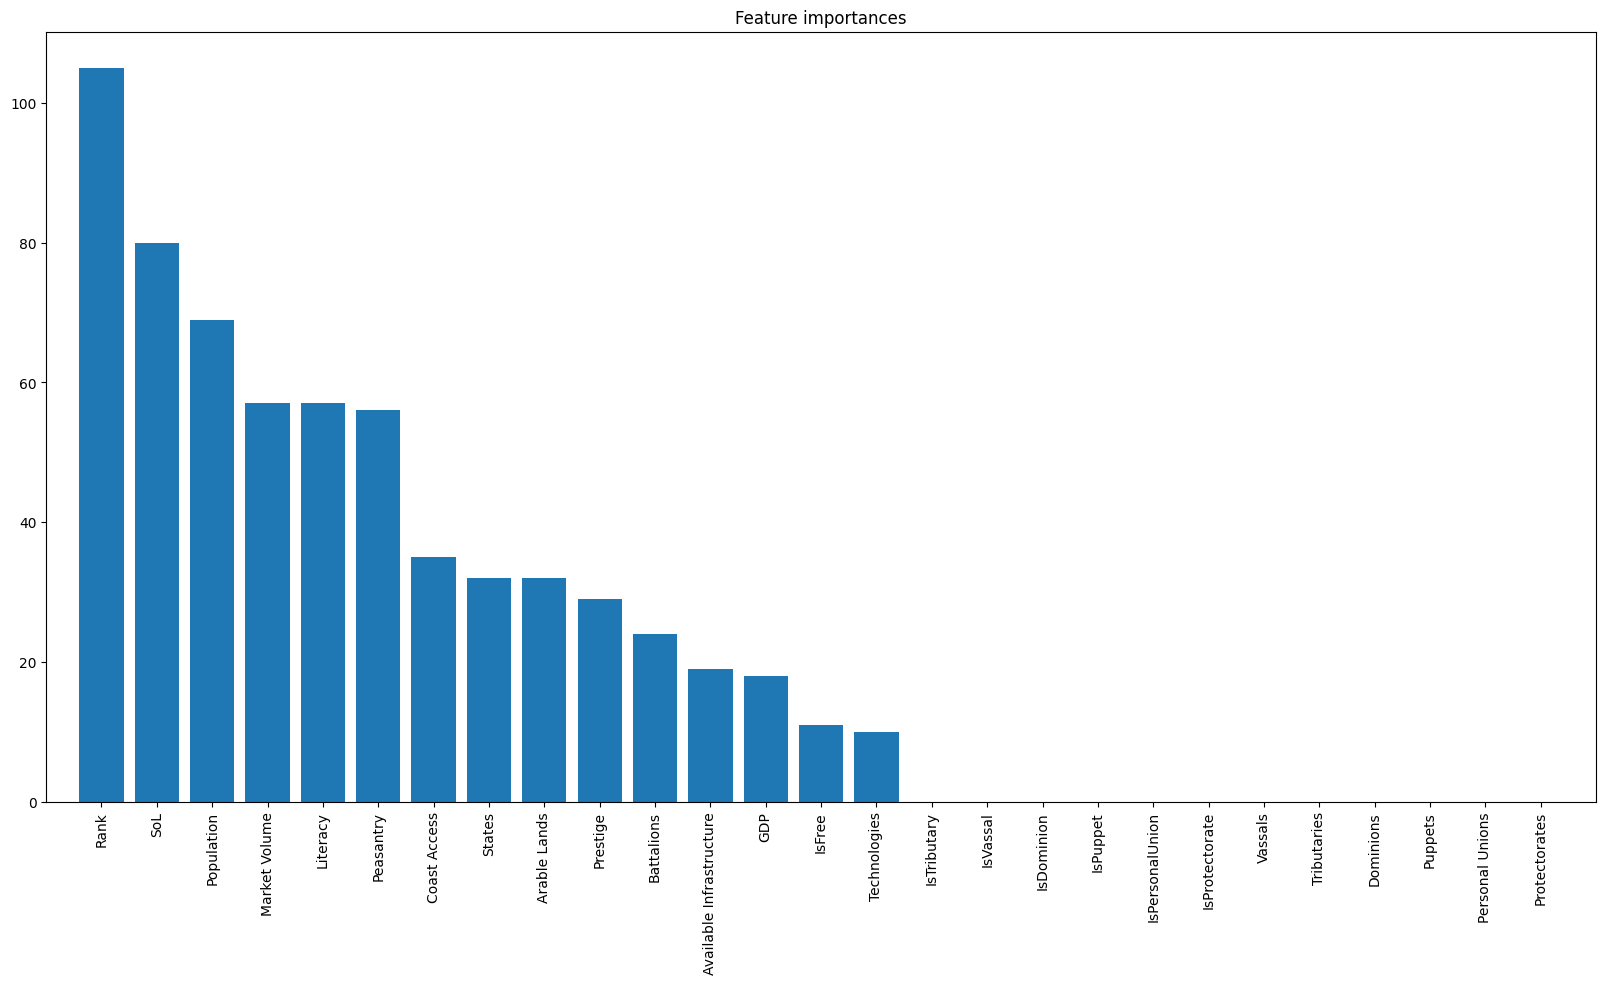

In [5]:
print(f"Best model: {best_model}")
print(best_results)

# Plot feature importance
model = models[best_model]

if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(20, 10))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

In [6]:
playable_countries = models[best_model].predict(X)
playable_countries = df[playable_countries == 1]
print(len(playable_countries))
playable_countries[["Country", "Playable"]]

103


,Country,Playable
0,Great Britain,1.0
1,France,1.0
2,Russia,1.0
3,Prussia,1.0
4,Austria,1.0
5,United States,1.0
6,Ottoman Empire,1.0
7,Spain,1.0
8,Netherlands,1.0
9,Sweden,1.0


In [7]:
X = playable_countries.drop(columns=["Playable", "Country"])

for use_scaller in [True, False]:

    if use_scaller:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X

    cluster_num = 10
    cluster_models = {
        "K Means": KMeans(n_clusters=cluster_num),
        "Agglomerative Clustering": AgglomerativeClustering(n_clusters=cluster_num),
        "Birch": Birch(n_clusters=cluster_num),
        "Affinity Propagation": AffinityPropagation(),
        "Spectral Clustering": SpectralClustering(n_clusters=cluster_num),
    }

    best_model = None
    best_silhouette_avg = -1
    for name, model in cluster_models.items():
        cluster_labels = model.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels) if len(set(cluster_labels)) > 1 else -1
        if silhouette_avg > best_silhouette_avg:
            best_silhouette_avg = silhouette_avg
            best_model = name
print(f"Best model: {best_model}")

model = cluster_models[best_model]
cluster_labels = model.fit_predict(X_scaled)

playable_countries["Cluster"] = cluster_labels
groupped_playable_countries = playable_countries.groupby("Cluster")
for name, group in groupped_playable_countries:
    print(f"Cluster {name}")
    print(group["Country"])
    print()

Best model: K Means
Cluster 0
8           Netherlands
16              Denmark
18              Bolivia
21              Bavaria
22    Sardinia-Piedmont
24          Philippines
25          New Granada
45                 Siam
47               Sokoto
Name: Country, dtype: object

Cluster 1
11    Great Qing
Name: Country, dtype: object

Cluster 2
0    Great Britain
1           France
Name: Country, dtype: object

Cluster 3
14    British East India Company
Name: Country, dtype: object

Cluster 4
3                Prussia
6         Ottoman Empire
7                  Spain
13    Japanese Shogunate
Name: Country, dtype: object

Cluster 5
4          Austria
5    United States
Name: Country, dtype: object

Cluster 6
9           Sweden
15        Portugal
19    Two Sicilies
20         Belgium
23          Mexico
46          Persia
Name: Country, dtype: object

Cluster 7
34        Central America
35              Argentina
40           Upper Canada
43                  Hesse
77               Moldavia
78  

d:\Projects\vic3\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Projects\vic3\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Oleksii\AppData\Local\Temp\ipykernel_2760\1332496669.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playable_countries["Cluster"] = cluster_labels
